In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/train-test-data/train_test_data.pkl


In [13]:
import pandas as pd
import numpy as np
import pickle
from copy import deepcopy
import matplotlib.pyplot as plt

In [14]:
# Importing processed split dataset from previous notebook "Feature Engineering"
with open ("/kaggle/input/train-test-data/train_test_data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [15]:
# Exporting each split dataset to a csv file 
X_train.to_csv("X_train_processed.csv", index=False)
X_test.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train_processed.csv", index=False)
y_test.to_csv("y_test_processed.csv", index=False)

Iteration 0, cost: 0.693147
Iteration 100, cost: 0.307104
Iteration 200, cost: 0.290232
Iteration 300, cost: 0.277505
Iteration 400, cost: 0.266627
Iteration 500, cost: 0.257159
Iteration 600, cost: 0.248816
Iteration 700, cost: 0.241390
Iteration 800, cost: 0.234727
Iteration 900, cost: 0.228708
Iteration 1000, cost: 0.223237
Iteration 1100, cost: 0.218239
Iteration 1200, cost: 0.213653
Iteration 1300, cost: 0.209428
Iteration 1400, cost: 0.205523
Iteration 1500, cost: 0.201902
Iteration 1600, cost: 0.198534
Iteration 1700, cost: 0.195396
Iteration 1800, cost: 0.192464
Iteration 1900, cost: 0.189719
Iteration 2000, cost: 0.187145
Iteration 2100, cost: 0.184726
Iteration 2200, cost: 0.182449
Iteration 2300, cost: 0.180303
Iteration 2400, cost: 0.178276
Iteration 2500, cost: 0.176360
Iteration 2600, cost: 0.174546
Iteration 2700, cost: 0.172827
Iteration 2800, cost: 0.171195
Iteration 2900, cost: 0.169644
Iteration 3000, cost: 0.168168
Iteration 3100, cost: 0.166763
Iteration 3200, cost

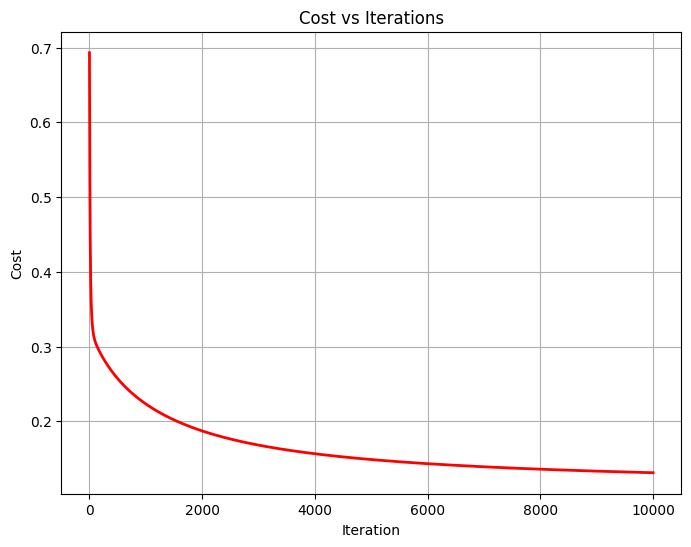

Training Accuracy: 95.44%
Test Accuracy: 95.44%


In [16]:
# Convert dataframes to a matrices for Logistic regression implementation
def to_numpy_format(df): 
    data = df.to_numpy()
    data = data.T 
    return data

X_train, X_test, y_train, y_test = [to_numpy_format(df) for df in [X_train, X_test, y_train, y_test]]

# Forward prop and computing cost
def forward (X, W, b):
    z = np.dot(W.T, X) + b 
    return z
def sigmoid (z): 
    a = 1/(1+np.exp(-z))
    return a
def compute_cost (A,Y):
    m = Y.shape[1]
    cost = (-1/m)* np.sum((Y*np.log(A))+ ((1-Y)*np.log(1-A)))
    return cost
def compute_gradient (X,Y,A):
    m = Y.shape[1]
    dW = (1/m)* np.dot(X,(A-Y).T)
    db = (1/m) * (np.sum(A-Y))
    return dW, db
def gradient_descent (W, b, dW, db, learning_rate): 
    W = W - learning_rate*dW 
    b = b - learning_rate*db
    return W, b
# Prediction function 
def predict (X,W,b): 
    Z = forward (X,W,b)
    A = sigmoid(Z)
    Y_pred = (A>0.5).astype(int)
    return Y_pred

# Accuracy function 
def model_accuracy (Y_true, Y_pred): 
    return 100 * np.mean(Y_true == Y_pred) 

# Implementing the previous functions to compute the parameters W and b that minimize the cost function J 
def model (X,Y, learning_rate, num_iterations, print_cost):
    n_x, m = X.shape
    W = np.zeros((n_x,1))
    b = 0 
    costs = []
    for i in range (num_iterations): 
        Z = forward (X, W, b) 
        A = sigmoid(Z)
        cost = compute_cost(A,Y)
        costs.append(cost)
        dW, db = compute_gradient(X,Y,A)
        W, b = gradient_descent(W, b, dW, db, learning_rate)
        if print_cost and i % 100 == 0:
            print(f"Iteration {i}, cost: {cost:.6f}")    
    return W, b, costs

W, b, costs = model(X_train, y_train, learning_rate = 0.1, num_iterations = 10000, print_cost=True)
W_dict = {f"W{i+1}": W[i,0] for i in range(W.shape[0])}
print(W_dict)
print (b)

# Suppose costs is your list of cost values
num_iterations = len(costs)
iterations = list(range(num_iterations))  # x-axis

plt.figure(figsize=(8,6))
plt.plot(iterations, costs, color='red', linewidth=2)
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


# Model Accuracy on training set and testing set: Evaluating model performance and if there exists overfitting problems 
# Predictions
Y_train_pred = predict(X_train, W, b)
Y_test_pred = predict(X_test, W, b)

# Accuracy
train_acc = model_accuracy(y_train, Y_train_pred)
test_acc = model_accuracy(y_test, Y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

#### In this section, I'll be investigating the confusion matrix of the model and how it performs in terms of identifying False positives and False negatives to later compute matrix that determine how the model performs in terms of precision and recall.

In [ ]:
# Delving deep into the performance of the model: Confusion Matrix 

def confusion_matrix_elements(y_true, y_pred): 
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true ==0) & (y_pred == 0))
    FP = np.sum ((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix_elements(y_test, Y_test_pred)

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()

# Annotate values
labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{labels[i][j]}\n{conf_matrix[i, j]}", 
                 ha='center', va='center', color='black', fontsize=12)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")